# Predicting Avocado Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
avacado=pd.read_csv(r"D:\datascience\Avacado_Price.csv")
avacado

AveragePrice  Total_Volume  tot_ava1   tot_ava2  tot_ava3  Total_Bags  \
0              1.33      64236.62   1036.74   54454.85     48.16     8696.87   
1              1.35      54876.98    674.28   44638.81     58.33     9505.56   
2              0.93     118220.22    794.70  109149.67    130.50     8145.35   
3              1.08      78992.15   1132.00   71976.41     72.58     5811.16   
4              1.28      51039.60    941.48   43838.39     75.78     6183.95   
...             ...           ...       ...        ...       ...         ...   
18244          1.63      17074.83   2046.96    1529.20      0.00    13498.67   
18245          1.71      13888.04   1191.70    3431.50      0.00     9264.84   
18246          1.87      13766.76   1191.92    2452.79    727.94     9394.11   
18247          1.93      16205.22   1527.63    2981.04    727.01    10969.54   
18248          1.62      17489.58   2894.77    2356.13    224.53    12014.15   

       Small_Bags  Large_Bags  Xlarge_Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 12 columns]

In [3]:
avacado.isna().sum() # checking for missing value

AveragePrice    0
Total_Volume    0
tot_ava1        0
tot_ava2        0
tot_ava3        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
Xlarge_Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
ava=avacado.drop(['year','region'],axis=1)
avac=ava.iloc[:,0:9]

In [5]:
avac.columns

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'Xlarge_Bags'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6a604b1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6a604b610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6a604af50>,
 'medians': [<matplotlib.lines.Line2D at 0x1e6a604bb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e6a604bdf0>,
 'means': []}

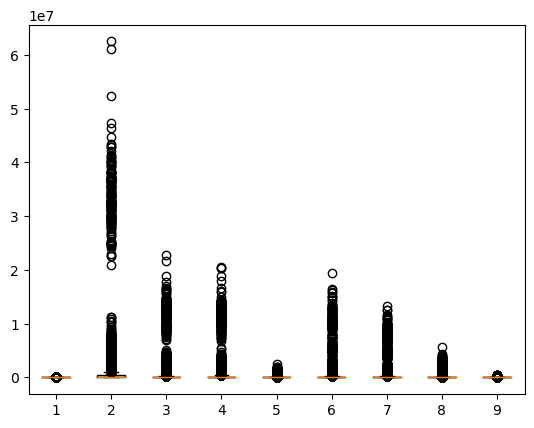

In [6]:
plt.boxplot(avac)

In [7]:
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method='iqr',
                  tail='both',
                  fold=1.5,
                  variables=['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3','Total_Bags', 'Small_Bags', 'Large_Bags', 'Xlarge_Bags'])
avac_t=winsor.fit_transform(avac[['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3','Total_Bags', 'Small_Bags', 'Large_Bags', 'Xlarge_Bags']])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6a8e51f30>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6a8e52470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6a8e51c90>,
 'medians': [<matplotlib.lines.Line2D at 0x1e6a8e529b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e6a8e52c50>,
 'means': []}

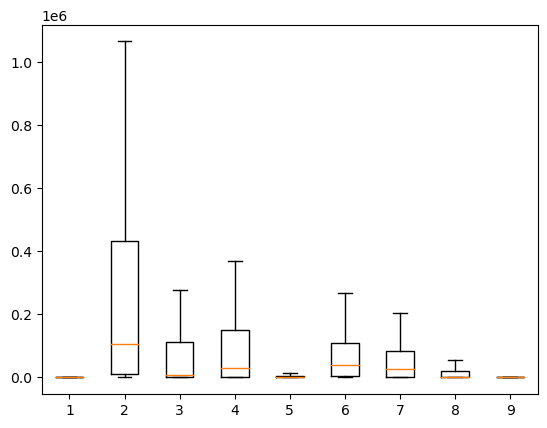

In [8]:
plt.boxplot(avac_t)

<BarContainer object of 18249 artists>

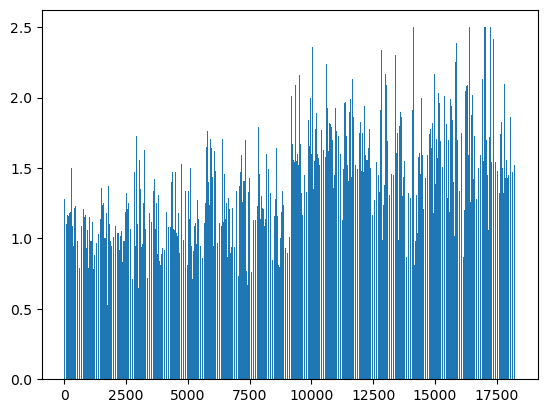

In [11]:
plt.bar(height = avac_t.AveragePrice, x = np.arange(1,18250 ,1))

(array([ 129.,  989., 2695., 3672., 3157., 3202., 2231., 1166.,  537.,
         471.]),
 array([0.44 , 0.646, 0.852, 1.058, 1.264, 1.47 , 1.676, 1.882, 2.088,
        2.294, 2.5  ]),
 <BarContainer object of 10 artists>)

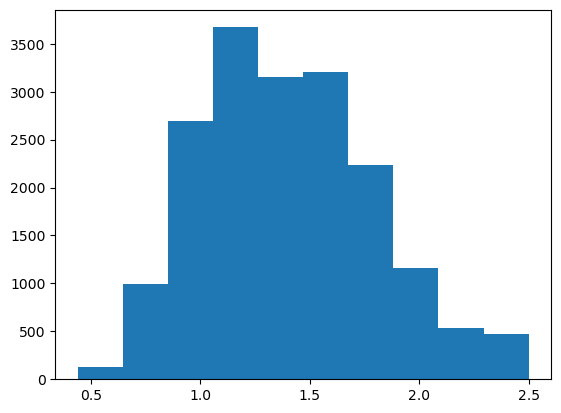

In [12]:
plt.hist(avac_t.AveragePrice) #histogram


In [13]:
col_of_replace=['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3','Total_Bags', 'Small_Bags', 'Large_Bags', 'Xlarge_Bags']
ava[col_of_replace]=avac_t[col_of_replace]

In [14]:
ava['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
ava['type']=labelencoder.fit_transform(ava[['type']])

C:\Users\reshm\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


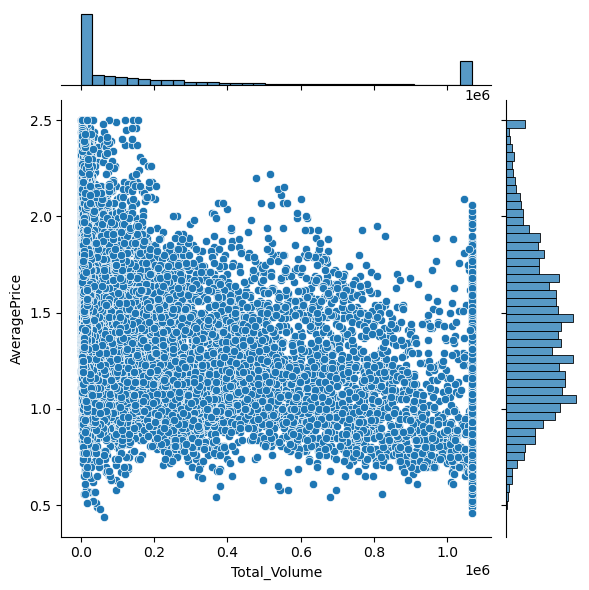

In [16]:
# Jointplot
import seaborn as sns
sns.jointplot(x=ava['Total_Volume'], y=ava['AveragePrice'])

<Axes: ylabel='count'>

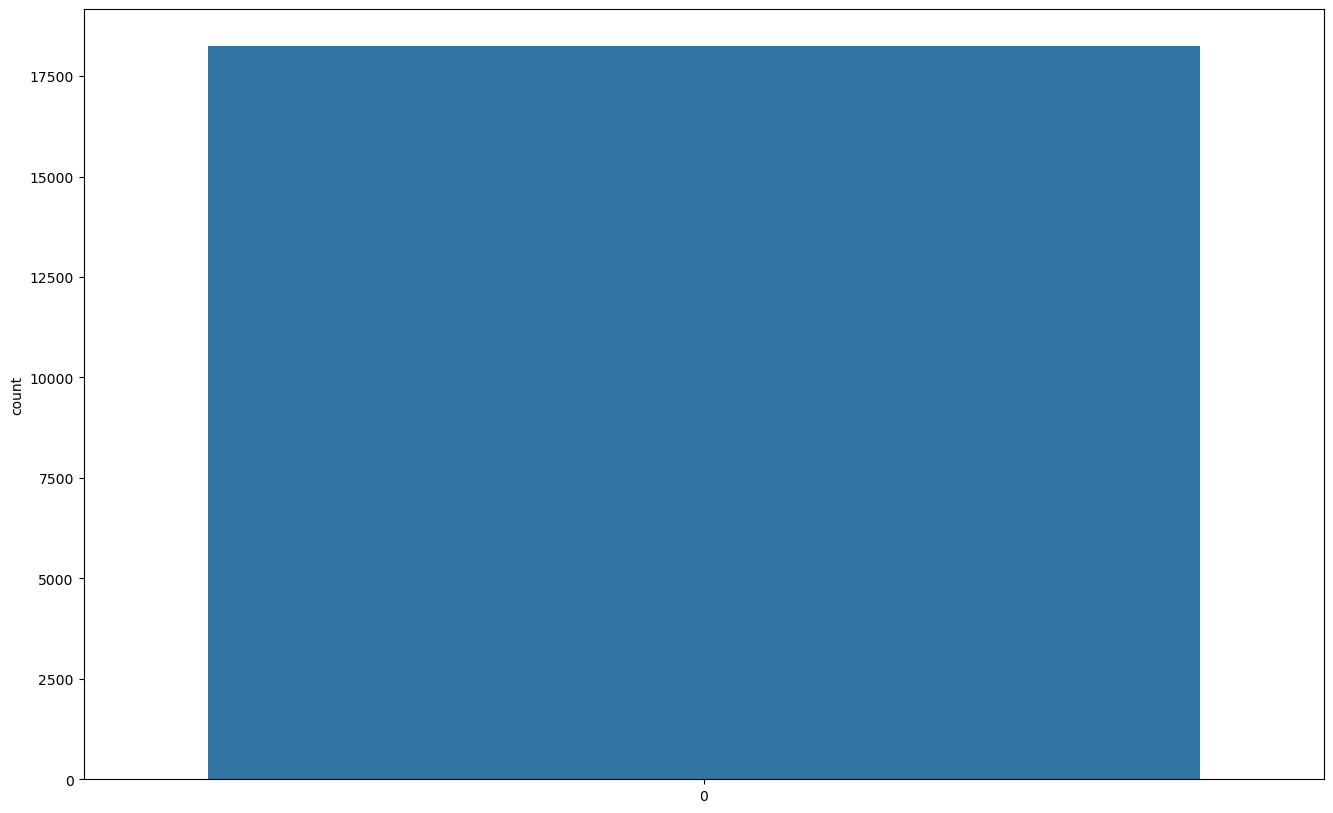

In [17]:
# Countplot
plt.figure(1, figsize=(16, 10))
sns.countplot(ava['Total_Volume'])

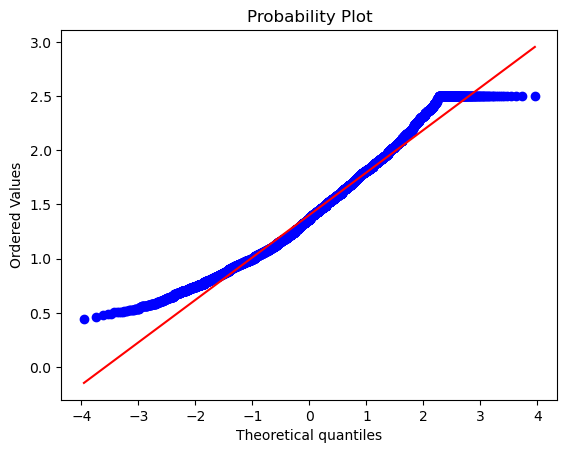

In [18]:
# Q-Q Plot
from scipy import stats
import pylab
stats.probplot(ava.AveragePrice, dist = "norm", plot = pylab)
plt.show()

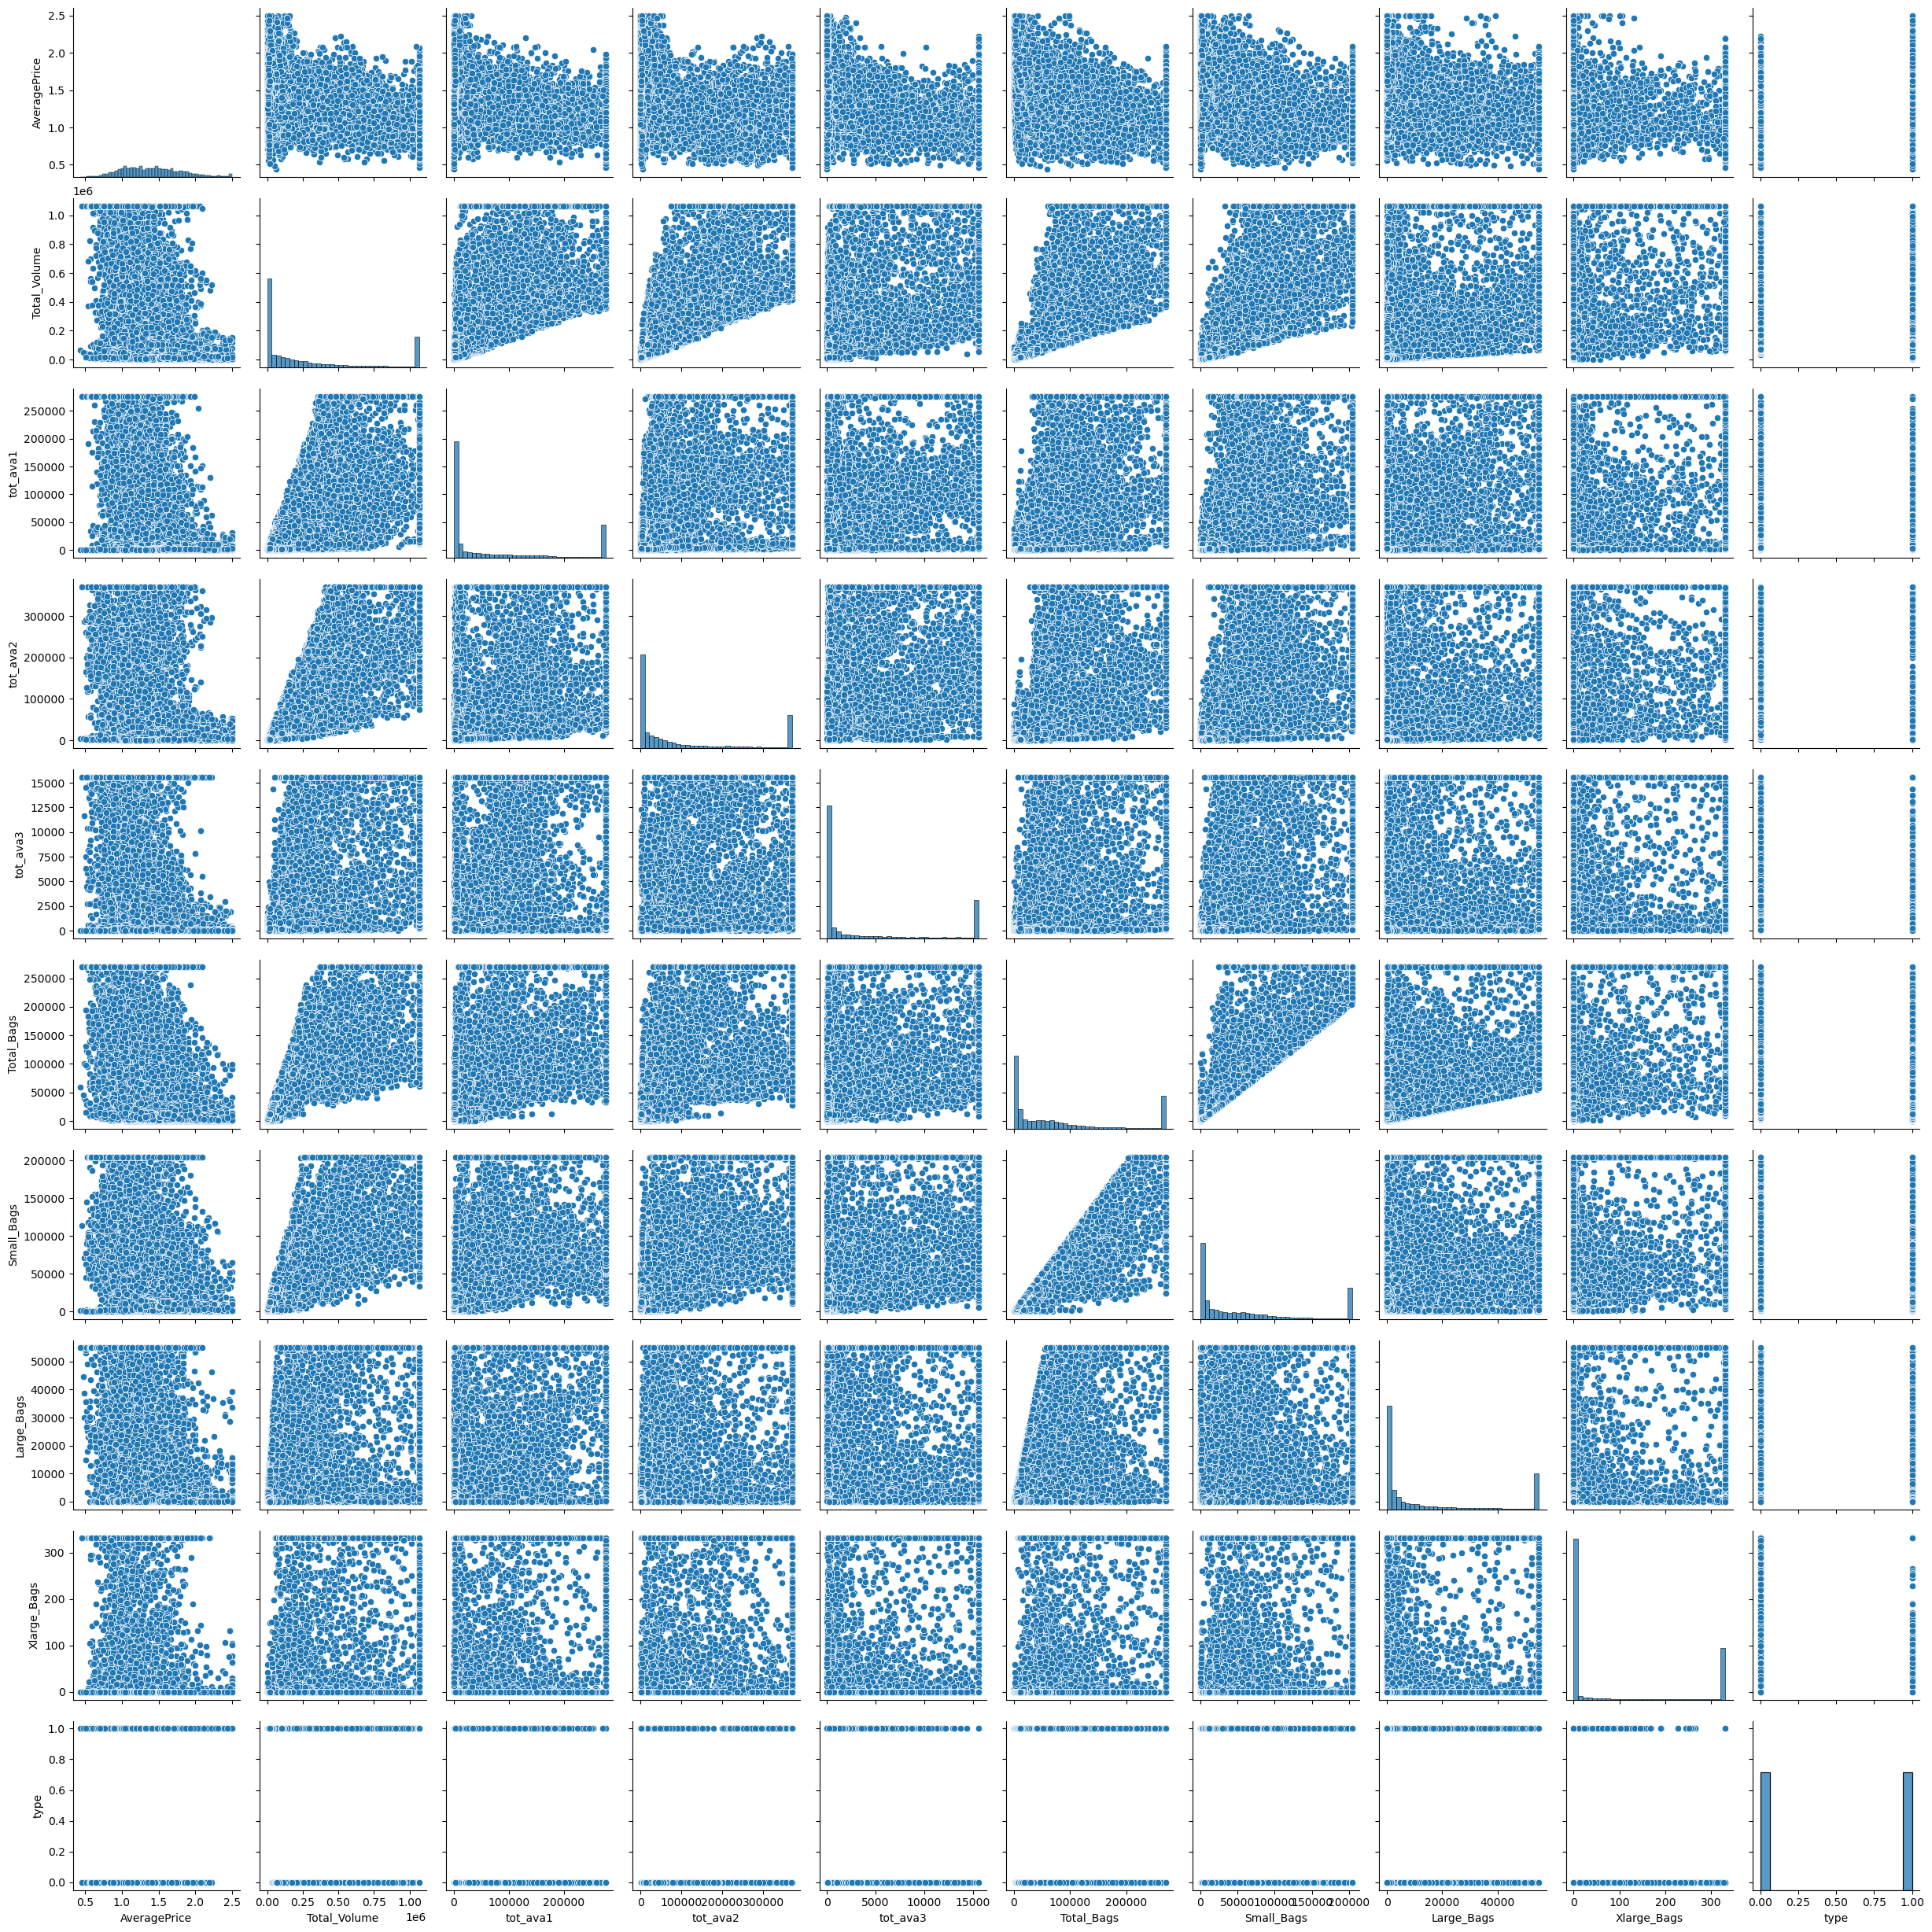

In [19]:

# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(ava.iloc[:, :])

In [20]:
ava.corr()

AveragePrice  Total_Volume  tot_ava1  tot_ava2  tot_ava3  \
AveragePrice      1.000000     -0.508013 -0.529095 -0.416055 -0.470443   
Total_Volume     -0.508013      1.000000  0.862914  0.918696  0.735324   
tot_ava1         -0.529095      0.862914  1.000000  0.679998  0.646679   
tot_ava2         -0.416055      0.918696  0.679998  1.000000  0.716079   
tot_ava3         -0.470443      0.735324  0.646679  0.716079  1.000000   
Total_Bags       -0.490911      0.926100  0.791529  0.809947  0.663865   
Small_Bags       -0.452942      0.911307  0.759106  0.827511  0.677017   
Large_Bags       -0.428966      0.706783  0.677472  0.561624  0.435210   
Xlarge_Bags      -0.355443      0.584318  0.536757  0.553875  0.559618   
type              0.621292     -0.655466 -0.627013 -0.627230 -0.610211   

              Total_Bags  Small_Bags  Large_Bags  Xlarge_Bags      type  
AveragePrice   -0.490911   -0.452942   -0.428966    -0.355443  0.621292  
Total_Volume    0.926100    0.911307    0.706783     0.584318 -0.655466  
tot_ava1        0.791529    0.759106    0.677472     0.536757 -0.627013  
tot_ava2        0.809947    0.827511    0.561624     0.553875 -0.627230  
tot_ava3        0.663865    0.677017    0.435210     0.559618 -0.610211  
Total_Bags      1.000000    0.961362    0.775343     0.599925 -0.623950  
Small_Bags      0.961362    1.000000    0.632182     0.600454 -0.620843  
Large_Bags      0.775343    0.632182    1.000000     0.429142 -0.464445  
Xlarge_Bags     0.599925    0.600454    0.429142     1.000000 -0.592029  
type           -0.623950   -0.620843   -0.464445    -0.592029  1.000000

In [21]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
         
ml1 = smf.ols('AveragePrice ~Total_Volume+ tot_ava1+ tot_ava2+tot_ava3+Total_Bags+ Small_Bags+Large_Bags+Xlarge_Bags+type', data = ava).fit()
ml1.summary()                            

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     1645.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:56:20   Log-Likelihood:                -3539.5
No. Observations:               18249   AIC:                             7099.
Df Residuals:                   18239   BIC:                             7177.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2474      0.006    211.244      0.000       1.236       1.259
Total_Volume -3.877e-07    3.7e-08    -10.486      0.000    -4.6e-07   -3.15e-07
tot_ava1     -2.457e-07   5.79e-08     -4.246      0.000   -3.59e-07   -1.32e-07
tot_ava2      9.596e-07   5.72e-08     16.781      0.000    8.48e-07    1.07e-06
tot_ava3     -9.128e-06   5.75e-07    -15.867      0.000   -1.03e-05      -8e-06
Total_Bags   -1.052e-06   1.47e-07     -7.146      0.000   -1.34e-06   -7.63e-07
Small_Bags    1.573e-06   1.55e-07     10.142      0.000    1.27e-06    1.88e-06
Large_Bags   -6.563e-07   2.32e-07     -2.834      0.005   -1.11e-06   -2.02e-07
Xlarge_Bags      0.0003   2.16e-05     12.257      0.000       0.000       0.000
type             0.4110      0.006     64.147      0.000       0.398       0.424
==============================================================================
Omnibus:                      498.461   Durbin-Watson:                   0.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              644.557
Skew:                           0.329   Prob(JB):                    1.09e-140
Kurtosis:                       3.644   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

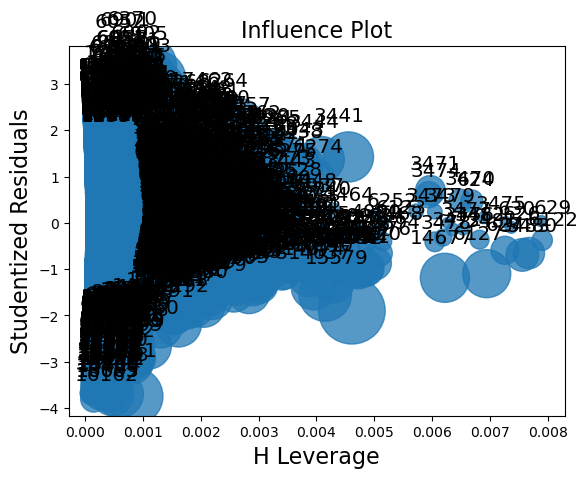

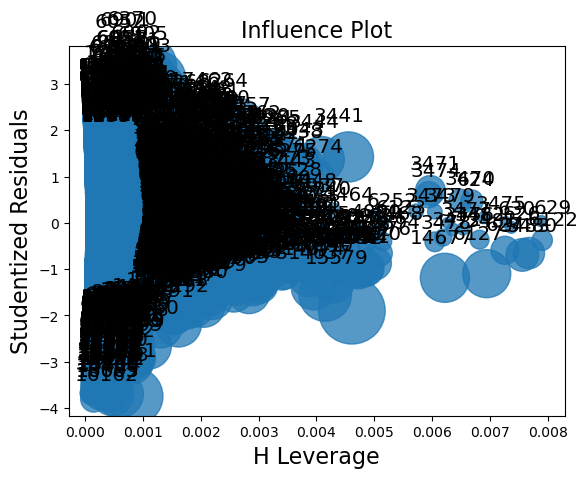

In [22]:
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)


In [23]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'ava' is your DataFrame
features = ['Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'Xlarge_Bags', 'type']

# Create a DataFrame with the selected features
X = ava[features]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the result
print(vif_data)


       Variable        VIF
0  Total_Volume  61.709153
1      tot_ava1   9.792293
2      tot_ava2  18.029409
3      tot_ava3   3.480987
4    Total_Bags  67.270420
5    Small_Bags  41.431474
6    Large_Bags   6.929964
7   Xlarge_Bags   2.401952
8          type   1.064179


In [24]:
# Find the variable with the highest VIF
variable_to_drop = vif_data.loc[vif_data['VIF'].idxmax()]['Variable']

# Drop the variable from the original DataFrame
ava = ava.drop(variable_to_drop, axis=1)

# Display the updated DataFrame
print(ava)


       AveragePrice  Total_Volume  tot_ava1   tot_ava2  tot_ava3  Small_Bags  \
0              1.33      64236.62   1036.74   54454.85     48.16     8603.62   
1              1.35      54876.98    674.28   44638.81     58.33     9408.07   
2              0.93     118220.22    794.70  109149.67    130.50     8042.21   
3              1.08      78992.15   1132.00   71976.41     72.58     5677.40   
4              1.28      51039.60    941.48   43838.39     75.78     5986.26   
...             ...           ...       ...        ...       ...         ...   
18244          1.63      17074.83   2046.96    1529.20      0.00    13066.82   
18245          1.71      13888.04   1191.70    3431.50      0.00     8940.04   
18246          1.87      13766.76   1191.92    2452.79    727.94     9351.80   
18247          1.93      16205.22   1527.63    2981.04    727.01    10919.54   
18248          1.62      17489.58   2894.77    2356.13    224.53    11988.14   

       Large_Bags  Xlarge_Bags  type  


In [25]:
final_ml = smf.ols('AveragePrice ~Total_Volume+ tot_ava1+ tot_ava2+tot_ava3+ Small_Bags+Large_Bags+Xlarge_Bags+type', data = ava).fit()
final_ml.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     1839.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:06:40   Log-Likelihood:                -3565.0
No. Observations:               18249   AIC:                             7148.
Df Residuals:                   18240   BIC:                             7218.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2454      0.006    210.852      0.000       1.234       1.257
Total_Volume -4.792e-07   3.47e-08    -13.792      0.000   -5.47e-07   -4.11e-07
tot_ava1     -1.499e-07   5.64e-08     -2.659      0.008    -2.6e-07   -3.94e-08
tot_ava2      1.076e-06   5.49e-08     19.608      0.000    9.69e-07    1.18e-06
tot_ava3     -9.222e-06   5.76e-07    -16.013      0.000   -1.04e-05   -8.09e-06
Small_Bags    6.247e-07   8.04e-08      7.773      0.000    4.67e-07    7.82e-07
Large_Bags   -1.832e-06   1.63e-07    -11.237      0.000   -2.15e-06   -1.51e-06
Xlarge_Bags      0.0003   2.15e-05     11.694      0.000       0.000       0.000
type             0.4132      0.006     64.461      0.000       0.401       0.426
==============================================================================
Omnibus:                      496.275   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.287
Skew:                           0.330   Prob(JB):                    4.12e-139
Kurtosis:                       3.634   Cond. No.                     1.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Prediction
pred = final_ml.predict(ava)

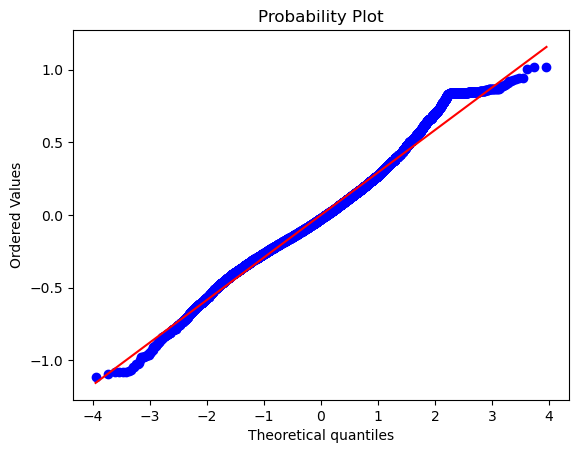

In [28]:
# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()


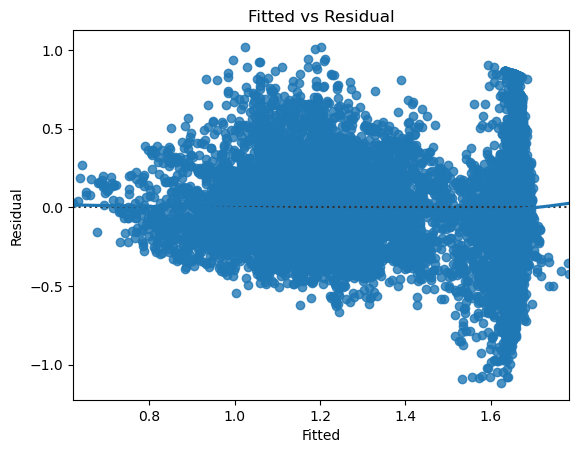

In [29]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y =ava.AveragePrice, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

In [30]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
ava_train, ava_test = train_test_split(ava, test_size = 0.2) # 20% test data

In [31]:
# preparing the model on train data 
model_train = smf.ols('AveragePrice ~Total_Volume+ tot_ava1+ tot_ava2+tot_ava3+ Small_Bags+Large_Bags+Xlarge_Bags+type', data = ava_train).fit()

In [32]:
# prediction on test data set 
test_pred = model_train.predict(ava_test)


In [33]:
# test residual values 
test_resid = test_pred -ava_test.AveragePrice 
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

0.294714367211481

In [34]:
# train_data prediction
train_pred = model_train.predict(ava_train)

# train residual values 
train_resid  = train_pred - ava_train.AveragePrice 
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

0.29405089161015163